In [2]:
from genutils import * 

In [5]:
#1. filter out foreign sequences
genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"
allgenomes = readgenfile(genfilename)

rusgenomes = filtergenomes(allgenomes, 'Rus')
rusgenfilename = "rus_sarscov2.fin.fas"
savegenfile(rusgenfilename, rusgenomes)
        
#for genome in rusgenomes:
#    print(genome['header'])
#for genome in rusgenomes:
#    print(len(genome['sequence']))
#dates = [ genome["header"].split('|')[2] for genome in rusgenomes]
#print(dates)

lines read:  11994
sequences read:  5997
sequences saved: 150


In [23]:
genfilename = "/data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"
allgenomes = readgenfile(genfilename)

spbgenomes = filtergenomes(allgenomes, 'StP')
rusgenfilename = "spb_sarscov2.fin.fas"
savegenfile(rusgenfilename, spbgenomes)
#print(spbgenomes)

with open("/data/sars-cov-2/2020_04_27/vreden_clade.txt", "r") as f:
    vredengenomes = []
    for line in f:
        line = line.rstrip()
        #print(line)
        vredengenomes.append(filtergenomes(spbgenomes,line)[0])
        

#print(vredengenomes)
savegenfile("vreden_sarscov2.fin.fas", vredengenomes)

lines read:  11994
sequences read:  5997
sequences saved: 84
sequences saved: 39


lines read:  300
sequences read:  150


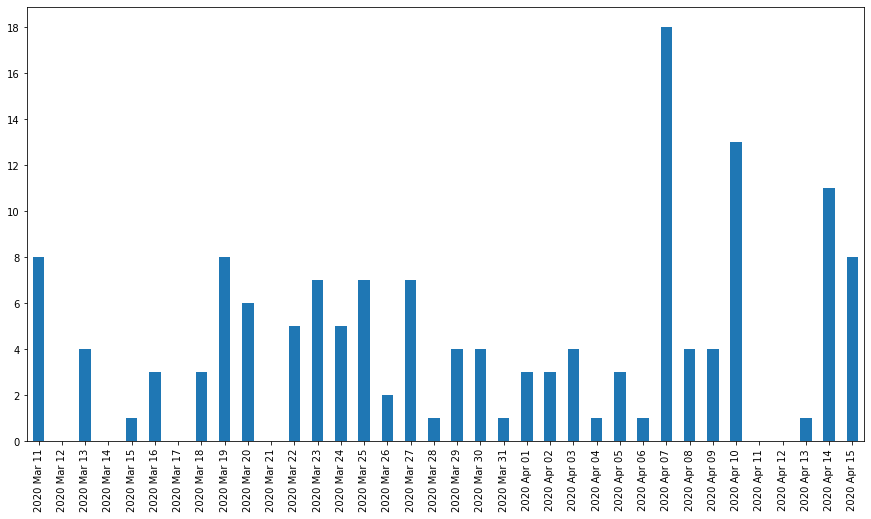

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

rusgenomes = readgenfile("rus_sarscov2.fin.fas")
splitheader = [ {'location':genome["header"].split('|')[0], \
                 'code':genome["header"].split('|')[1], \
                 'date': genome["header"].split('|')[2]} \
               for genome in rusgenomes]

# Creates DataFrame.  
df = pd.DataFrame(splitheader)  
df["date"] = df["date"].astype("datetime64")  
existdatecounts = df["date"].value_counts()
datelist = pd.date_range(df['date'].min(), df['date'].max())

alldatecounts = [0]*datelist.size
for idx, date in enumerate(datelist):
    if date in existdatecounts:
        alldatecounts[idx] = existdatecounts[date]
        
ts = pd.Series(alldatecounts,  index=datelist)

ax = ts.plot(kind='bar', figsize=(15,8), yticks=range(0,max(alldatecounts)+1,2))
ticklabels = ['']*len(ts.index)
ticklabels[::1] = [item.strftime('%Y %b %d') for item in ts.index[::1]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))


#plt.gcf().autofmt_xdate()
plt.show()



In [10]:
rusgenomes = readgenfile("rus_sarscov2.fin.fas")
mean,variance = getgensampleparams(rusgenomes)
print("Aligned samples from Russia: mean sequence length: {}, variance: {}".format(mean, variance))

sequences = [ genome["sequence"] for genome in rusgenomes]
fullline = ''.join(sequences)
bases = set(fullline)
total = len(fullline)
for character in bases:
    count = fullline.count(character)
    print (character, count, count/total)


lines read:  300
sequences read:  150
Aligned samples from Russia: mean sequence length: 29405.0, variance: 0.0
c 808624 0.18333027262937143
t 1419482 0.3218232726860511
a 1318817 0.299000623476733
g 863827 0.19584583120784446




In [11]:
chinagenomes = readgenfile("/data/sars-cov-2/all.fasta")

longchgen = filtergensize(chinagenomes, "greater", 29000)

print("filtered sequences (length>29000):", len(longchgen))
mean,variance = getgensampleparams(longchgen)

print("Samples from China: mean sequence length: {}, variance: {}".format(mean, variance))

sequences = [ genome["sequence"] for genome in longchgen]
fullline = ''.join(sequences)
bases = set(fullline)
total = len(fullline)
for character in bases:
    count = fullline.count(character)
    print (character, count, count/total)

#for idx, genome in enumerate(longchgen):
#    print ("{}: {}".format(idx+1,len(genome["sequence"])))

lines read:  3794
sequences read:  1897
filtered sequences (length>29000): 1790
Samples from China: mean sequence length: 29813.97653631285, variance: 10694.696656159349
T 17048295 0.31945376824314975
M 26 4.871922954361062e-07
C 9748710 0.18267293855542013
a 1 1.873816520908101e-08
H 117 2.192365329462478e-06
D 20 3.747633041816202e-07
Y 128 2.398485146762369e-06
V 18 3.3728697376345817e-07
N 281095 0.005267204549446626
B 8 1.4990532167264807e-07
W 53 9.931227560812936e-07
A 15870595 0.29738583107641503
t 1 1.873816520908101e-08
G 10417844 0.19521128199443333
S 8 1.4990532167264807e-07
n 21 3.935014693907012e-07
R 45 8.432174344086454e-07
K 33 6.183594518996734e-07


In [33]:
from ete3 import Tree, PhyloTree
from nexus import NexusReader
treefile = "/data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.treefile.tre"

n = NexusReader.from_file(treefile)
#sarstree = '[&R]'+n.trees.trees[0].newick_string
sarstree = n.trees.trees[0].newick_string

t = Tree(sarstree,  format=1)
#t = PhyloTree(sarstree)
#print(t)